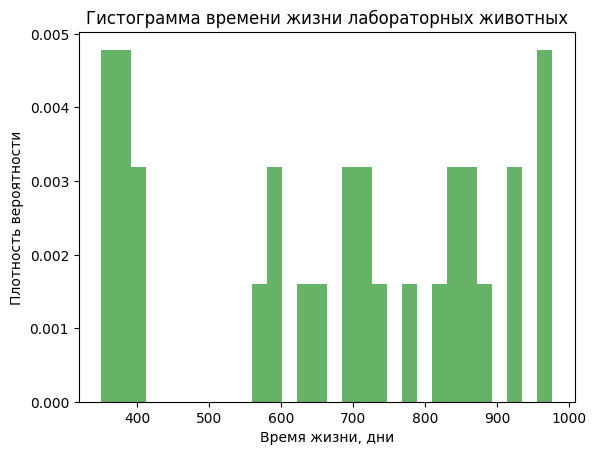

/home/anya/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


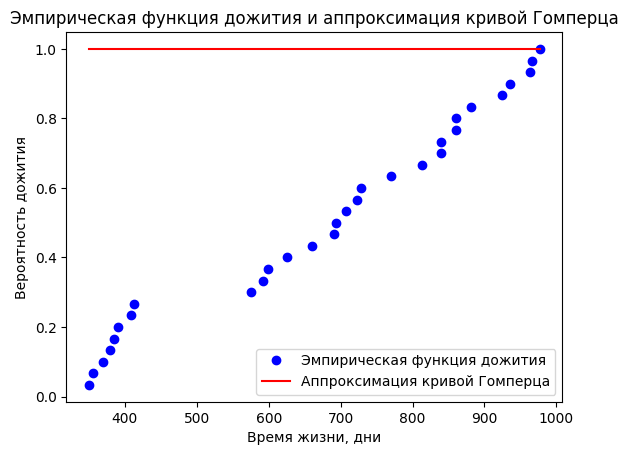

Параметры кривой Гомперца: a=1.0, b=1.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Внесем данные в файл
data = np.array([966, 660, 355, 385, 391, 728, 813, 925, 625, 693, 723, 861, 576, 707, 770, 370, 935, 691, 977, 963, 379, 412, 409, 861, 350, 839, 839, 881, 599, 592])
np.savetxt("data.txt", data)

# Вставим код для анализа данных

data = np.loadtxt("data.txt")

# Эмпирическая функция дожития
data_sorted = np.sort(data)
y = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Условная функция дожития
def conditional_survival(t, data):
    return np.sum(data > t) / len(data)

# Гистограмма
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Время жизни, дни')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма времени жизни лабораторных животных')
plt.show()

# Аппроксимация кривой Гомперца
def gompertz(t, a, b):
    return np.exp(-a * np.exp(-b * t))

params, covariance = curve_fit(gompertz, data_sorted, y)
a, b = params

plt.plot(data_sorted, y, 'bo', label='Эмпирическая функция дожития')
plt.plot(data_sorted, gompertz(data_sorted, a, b), 'r-', label='Аппроксимация кривой Гомперца')
plt.xlabel('Время жизни, дни')
plt.ylabel('Вероятность дожития')
plt.legend()
plt.title('Эмпирическая функция дожития и аппроксимация кривой Гомперца')
plt.show()

print(f"Параметры кривой Гомперца: a={a}, b={b}")